In [1]:
%matplotlib inline
import numpy as np
import yfinance as yf
from arch import arch_model
from alpha_vantage.timeseries import TimeSeries

In [2]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(16,6))
plt.rc('font', family='sans-serif')
plt.rc('font', size=14)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

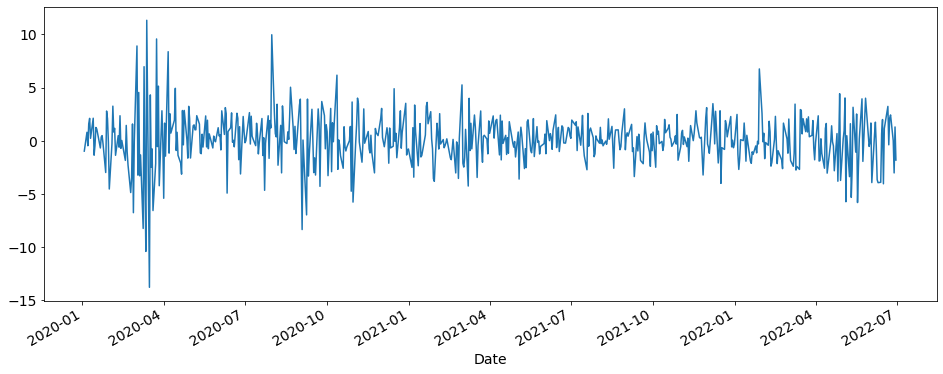

In [9]:
data = yf.download('AAPL', start='2020-01-01', end='2022-07-01')['Adj Close']
log_returns = 100*(np.log(data) - np.log(data.shift(1))).dropna()
log_returns.plot()

In [8]:
model = arch_model(log_returns)
res = model.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2537.329545681092
Iteration:      2,   Func. Count:     15,   Neg. LLF: 31293.763366186533
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1695.9875336029213
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1575.6200254986352
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1345.1995470557679
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1345.1895922537915
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1345.1892851355515
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1345.1892713897664
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1345.1892705568355
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1345.1892705568355
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:       

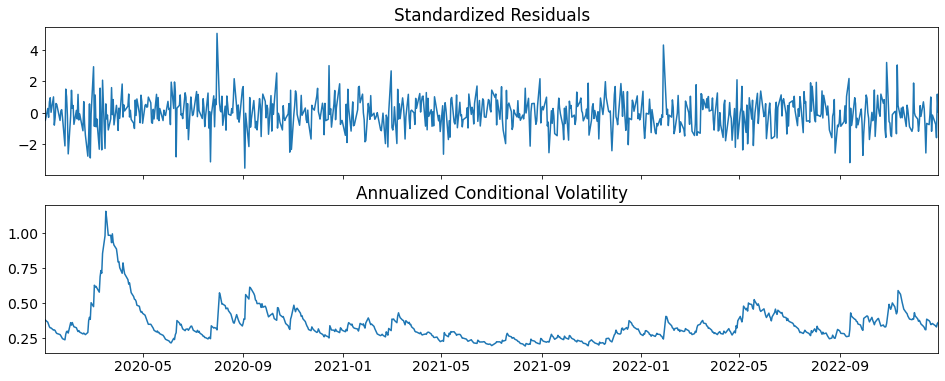

In [28]:
fig = res.plot('D')

In [ ]:
# get the variance forecast
forecast = res.forecast(horizon=1, reindex=False)
variance_forecast = forecast.variance.iloc[-1][0]